In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# matplotlib.pyplot에서 자주 발생하는 문제들 01. 한글 깨짐 문제
# 그래프의 제목 또는 축 설정 시 한글로 작성하면 깨지는 문제가 발생.
# matplotlib의 pyplot 패키지가 기본으로 설정한 폰트가 한글을 지원하지 않기 때문.

/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

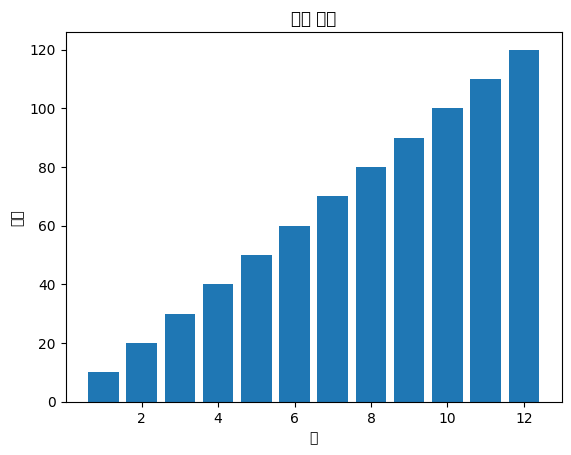

In [4]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

fig = plt.figure(figsize=(6.4, 4.8))

plt.bar(x, y)
plt.title('월별 지출')
plt.xlabel('월')
plt.ylabel('비용')
plt.show()

# 모든 한글이 네모 모양으로 깨져서 출력되는 것을 볼 수 있음.

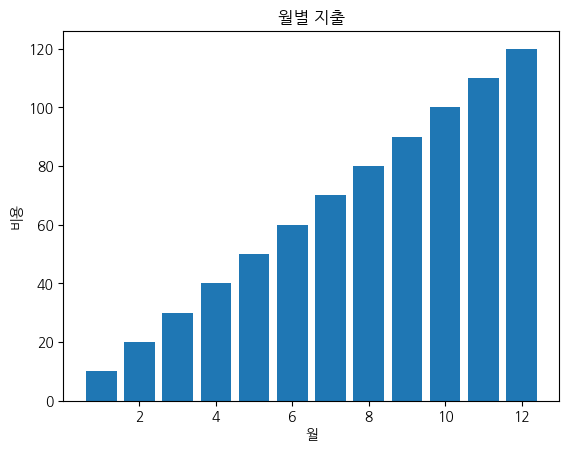

In [5]:
# 한글 깨짐의 해결 방법은 한글을 지원하는 font로 변경해주면 됨.
plt.rcParams["font.family"] = "NanumGothic"

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

fig = plt.figure(figsize=(6.4, 4.8))

plt.bar(x, y)
plt.title("월별 지출")
plt.xlabel("월")
plt.ylabel("비용")
plt.show()

# 'plt.rcParams["font_family"] = "NanumGothic"를 맨 처음에 입력해주면, 앞으로의 모든 한글 입력 시 깨짐 문제가 발생하지 않음.

In [6]:
# Linux 기준 시스템에 설치된 한글 font를 확인하는 구문
import matplotlib.font_manager as fm

font_list = [f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name or 'Nanum' in f.name]

print(font_list)

['NanumSquare', 'URW Gothic', 'NanumBarunGothic', 'NanumGothicCoding', 'NanumBarunGothic', 'NanumMyeongjo', 'URW Gothic', 'Noto Sans Gothic', 'NanumSquareRound', 'NanumSquare', 'NanumGothicCoding', 'NanumGothic', 'URW Gothic', 'NanumMyeongjo', 'URW Gothic', 'NanumSquareRound', 'NanumGothic']


In [7]:
# 위 코드는 나눔 또는 고딕이 들어간 font명을 찾기 때문에,
# 내 PC에 설치된 폰트들 중 한글을 지원하는 폰트가 무엇인지 전수조사를 하는 코드를 GPT한테 만들어달라고 함.
from matplotlib import font_manager as fm
from fontTools.ttLib import TTFont

# 한글의 범위
HANGUL_RANGES = [
    (0xAC00, 0xD7A3),
    (0x1100, 0x11FF),
    (0x3130, 0x318F),
    (0xA960, 0xA97F),
    (0xD7B0, 0xD7FF)
]

def has_hangul(font_path: str) -> bool:
    try:
        tt = TTFont(font_path, lazy=True)
        cmap = tt.getBestCmap() or {}
        # cmap의 key는 unicode codePoint (int)
        for start, end in HANGUL_RANGES:
            # 범위 내에 하나라도 있으면 한글 지원으로 간주
            if any(cp in cmap for cp in range(start, end + 1)):
                return True
        return False
    except Exception:
        # 손상/권한/지원 포맷 문제 등은 판단이 불가함으로 False로 처리하기.
        return False
    
# fontconfig 기반으로 Matplotlib이 접근 가능한 폰트 파일들을 수집.
font_paths = fm._get_fontconfig_fonts()
# 보기 좋게 폰트의 이름도 같이 추출.
hangul_fonts = []
for p in font_paths:
    if has_hangul(p):
        name = fm.FontProperties(fname=p).get_name()
        hangul_fonts.append((name, p))

# 중복을 제거하기. (같은 이름과 경로의 반복을 방지.)
hangul_fonts = sorted(set(hangul_fonts), key=lambda x: x[0].lower())

print(f"한글 지원 폰트 개수(추정): {len(hangul_fonts)}")
for name, path in hangul_fonts[:30]:
    print(name, "=>", path)

한글 지원 폰트 개수(추정): 25
Droid Sans Fallback => /usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf
NanumBarunGothic => /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic => /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic => /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothic => /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumGothicCoding => /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
NanumGothicCoding => /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumMyeongjo => /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo => /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquare => /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquare => /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound => /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquareRound => /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
UnBatang => /usr/share/fonts/truetype/unfonts-core/

In [8]:
# matplotlib.pyplot에서 자주 발생하는 문제들 02. 마이너스 기호(-) 표시 문제
# 한글, x축 및 y축에 음수가 포함되면, 마이너스 기호를 정상적으로 표시하지 않는 문제 발생.
# matplotlib이 unicode의 마이너스 기호(U+2212)를 사용하려고 하지만,
# 설정된 폰트가 해당 문자를 지원하지 않을 때 발생함.

/home/achieveho/Venv/DataAnalysis/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


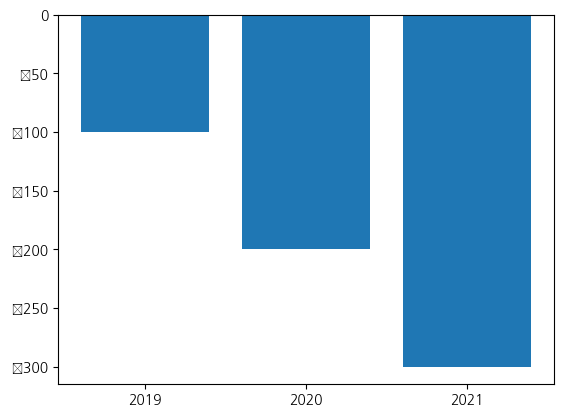

In [10]:
x = ['2019', '2020', '2021']
y = [-100, -200, -300]

plt.bar(x, y)
plt.show()

# 일단 - 기호가 네모 모양으로 깨짐.
# 그리고 설정에서 바꿔야겠지만, y값이 0이 제일 높은 것으로 되어서 그래프가 아래로 내려오는 형태가 됨.

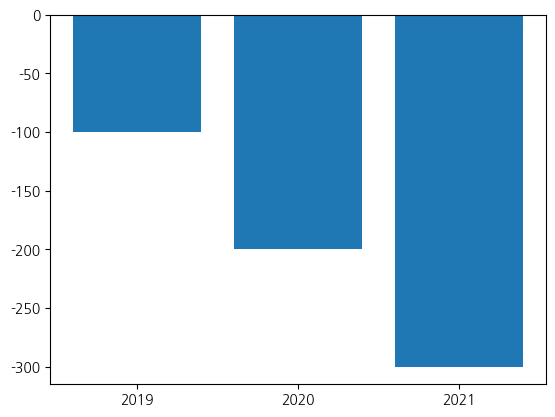

In [12]:
# '-' 기호 깨지지 않게 하는 방법
# 앞으로 matplotlib 쓸 때 'import matplotlib as mpl'도 같이 적자.
# 그리고 바로 아래 줄에 'import matplotlib.pyplot as plt'도 적자.
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

x = ['2019', '2020', '2021']
y = [-100, -200, -300]

plt.bar(x, y)
plt.show()

# 'mpl.rcParams['axes.unicode_minus'] = False'에서 True가 아니라 False이니까 오타에 주의하기.

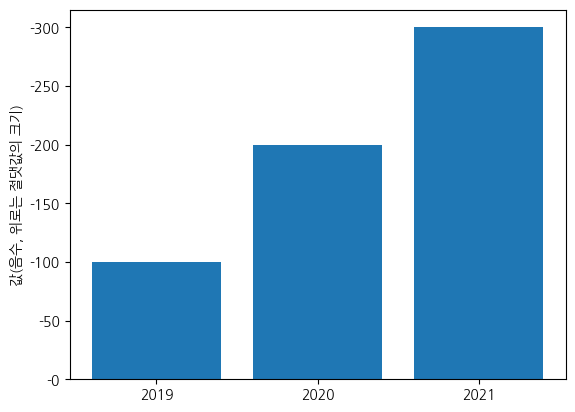

In [15]:
# 위의 그래프를 막대 그래프가 아래가 아닌 위로 진행하도록 바꿔보고 싶었음.
# 그래서 GPT한테 도움을 요청함.
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

mpl.rcParams['axes.unicode_minus'] = False

x = ['2019', '2020', '2021']
y = [-100, -200, -300]

y_abs = [abs(v) for v in y]

fig, ax = plt.subplots()
ax.bar(x, y_abs)

# 눈금 라벨만 음수로 보이게 포맷하기.
# FuncFormatter는 함수로 문자열 포맷이 가능.
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{-v:g}"))

ax.set_ylabel("값(음수, 위로는 절댓값의 크기)")
plt.show()

# 01. 일단 '-' 기호가 깨지지 않게 "mpl.rcParams['axes.unicode_minus'] = False"를 작성.
# 02. 'y_abs'라는 변수를 만들어 그 안에 y 리스트의 요소의 값들을 절대값으로 바꾼 후, 그것들을 리스트로 저장.
# 03. 'ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{-v:g}"))'를 입력해서 포맷 설정.

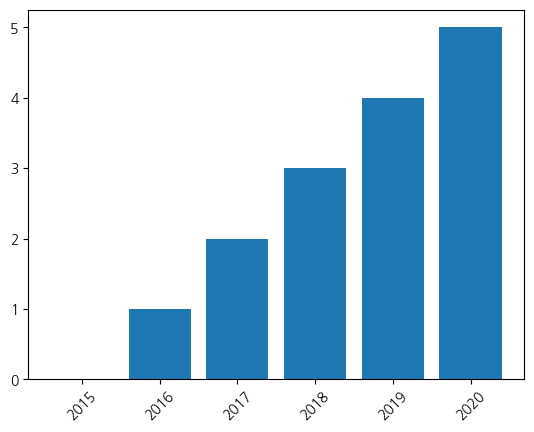

In [16]:
# matplotlib.pyplot에서 자주 발생하는 문제들 03. x축 겹침 문제
# x축 또는 y축에 표시해야 할 값이 많으면, 각 값이 겹치게 되어 가독성이 떨어질 수 있음.
# figsize의 크기와 상관없이 발생하는 문제.
# 축에 표시되는 값을 기울여서 표시하면 겹침 해결 가능.
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2015, 2021)
y = np.arange(len(x))

plt.bar(x, y)
plt.xticks(rotation=45)     # 각도를 45도로 기울이도록 설정.
plt.show()

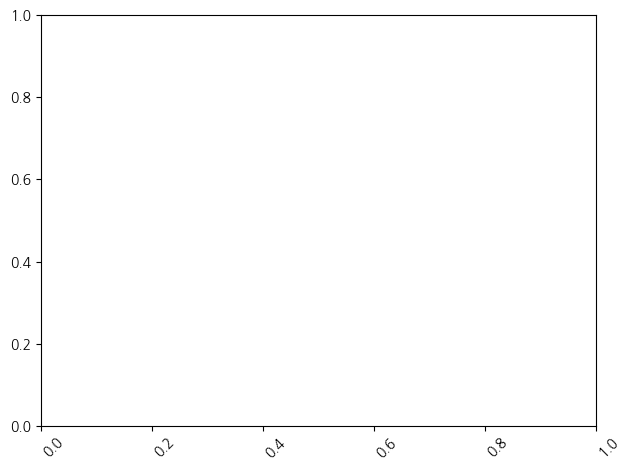

In [18]:
# x축의 정렬 옵션
# 01. 정렬 방식을 조정하기.
plt.xticks(rotation=45, ha='right')     # 우측으로 정렬
plt.xticks(rotation=45, ha='center')    # 중앙으로 정렬
plt.xticks(rotation=45, ha='left')      # 왼쪽으로 정렬

# 레이아웃을 자동으로 조정하기.
plt.tight_layout()